# Importing the libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
import matplotlib.pyplot as plt

# Building the neural network architecture

In [2]:
model = Sequential()

In [3]:
model.add(Conv2D(32, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))

In [4]:
model.add(Conv2D(32, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))

In [5]:
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

In [6]:
model.add(Conv2D(64, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))

In [7]:
model.add(Conv2D(64, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))

In [8]:
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(kernel_initializer="random_uniform", activation="relu", units=300))

In [11]:
model.add(Dense(kernel_initializer="random_uniform", activation="relu", units=300))

In [12]:
model.add(Dense(kernel_initializer="random_uniform", activation="sigmoid", units=1))

In [13]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

# Importing The Images

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,width_shift_range=0.1,height_shift_range=0.1)

In [17]:
test_data = ImageDataGenerator(rescale=1./255)

In [18]:
x_train = train_data.flow_from_directory(r"D:\DATA SCIENCE\Datasets\chest_xray\train", target_size=(64,64), batch_size=32, 
                                                                     color_mode="rgb",class_mode="binary")

Found 5232 images belonging to 2 classes.


In [19]:
x_test = test_data.flow_from_directory(r"D:\DATA SCIENCE\Datasets\chest_xray\test", target_size=(64,64), batch_size=32, 
                                                                   color_mode="rgb", class_mode="binary")

Found 624 images belonging to 2 classes.


In [20]:
x_train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [21]:
x_test.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Visualizing the images

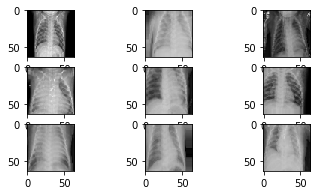

In [22]:
for i, image in enumerate(x_train,1):
    if i==10:
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][0])

In [23]:
len(x_train)

164

In [24]:
len(x_test)

20

# Fitting the model

In [25]:
model.fit(x_train, steps_per_epoch=164, epochs=20, validation_data=x_test, validation_steps=20)

Epoch 1/20
164/164 [==============================] - 284s 2s/step - loss: 0.4489 - accuracy: 0.7997 - val_loss: 0.4585 - val_accuracy: 0.7580
Epoch 2/20
164/164 [==============================] - 280s 2s/step - loss: 0.3095 - accuracy: 0.8702 - val_loss: 0.3740 - val_accuracy: 0.8237
Epoch 3/20
164/164 [==============================] - 289s 2s/step - loss: 0.2784 - accuracy: 0.8821 - val_loss: 0.3887 - val_accuracy: 0.8109
Epoch 4/20
164/164 [==============================] - 242s 1s/step - loss: 0.2383 - accuracy: 0.8974 - val_loss: 0.4423 - val_accuracy: 0.8301
Epoch 5/20
164/164 [==============================] - 219s 1s/step - loss: 0.2177 - accuracy: 0.9077 - val_loss: 0.2599 - val_accuracy: 0.8990
Epoch 6/20
164/164 [==============================] - 258s 2s/step - loss: 0.1965 - accuracy: 0.9138 - val_loss: 0.3940 - val_accuracy: 0.8638
Epoch 7/20
164/164 [==============================] - 269s 2s/step - loss: 0.2010 - accuracy: 0.9148 - val_loss: 0.2904 - val_accuracy: 0.8894

# Saving the model

In [26]:
model.save("PNEUMONIA_1.h5")